In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("adult.csv")
print(df.head())


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [4]:
df[df == '?'] = np.nan
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [6]:
for col in ["workclass", "occupation", "native.country"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns.drop('income')
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
data_encoded.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,4356,18,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,4356,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
data_encoded['income'] = label_encoder.fit_transform(data_encoded['income'])

X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8367284266557478

In [9]:
from sklearn.model_selection import cross_val_score

lda_cv = LinearDiscriminantAnalysis()

cv_scores = cross_val_score(lda_cv, X, y, cv=5)
mean_cv_score = cv_scores.mean()
mean_cv_score

0.8292742854868603

Confusion matrix:
[[22810  1910]
 [ 3649  4192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     24720
           1       0.69      0.53      0.60      7841

    accuracy                           0.83     32561
   macro avg       0.77      0.73      0.75     32561
weighted avg       0.82      0.83      0.82     32561

ROC-AUC Score: 0.7286801566655069


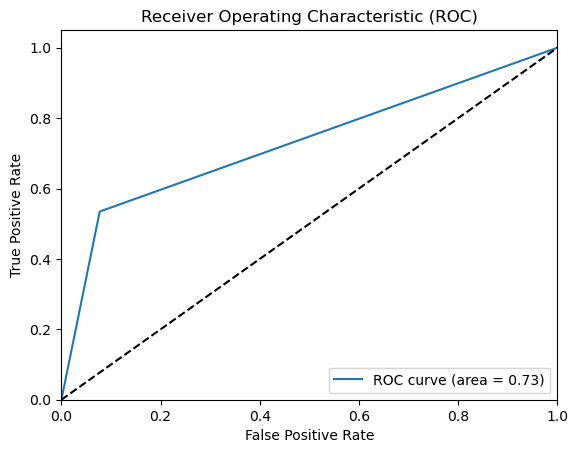

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(lda_cv, X, y, cv=5)

conf_matrix = confusion_matrix(y, y_pred_cv)

class_report = classification_report(y, y_pred_cv)

roc_auc = roc_auc_score(y, y_pred_cv)
fpr, tpr, thresholds = roc_curve(y, y_pred_cv)
print("Confusion matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print("ROC-AUC Score:", roc_auc)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

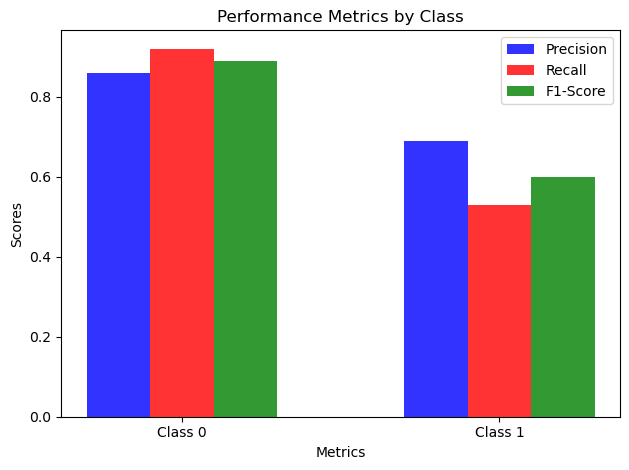

In [19]:
# Since there was an error with the previous execution, let's try to generate the bar chart again.

# Extracted data from the provided classification report
precision = [0.86, 0.69]  # Precision for class 0 and class 1
recall = [0.92, 0.53]     # Recall for class 0 and class 1
f1_score = [0.89, 0.60]   # F1-score for class 0 and class 1

# Define the range for the number of classes
n_groups = 2

# Create a bar chart
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.8

# Plotting each metric in a grouped bar chart
rects1 = ax.bar(index, precision, bar_width, alpha=opacity, color='b', label='Precision')
rects2 = ax.bar(index + bar_width, recall, bar_width, alpha=opacity, color='r', label='Recall')
rects3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, alpha=opacity, color='g', label='F1-Score')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('Class 0', 'Class 1'))
ax.legend()

fig.tight_layout()
plt.show()


In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score


qda = QuadraticDiscriminantAnalysis()
cv_scores_qda = cross_val_score(qda, X, y, cv=5)
mean_cv_score_qda = cv_scores_qda.mean()
print("QDA Accuracy:", mean_cv_score_qda)

/Users/bingshenyang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/bingshenyang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/bingshenyang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/bingshenyang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/bingshenyang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Accuracy: 0.6573633209860754


In [13]:
# try reduce some dimensions

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# First, apply PCA to the data to reduce dimensionality
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Next, create and evaluate the QDA model on the transformed data
qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, X_pca, y, cv=5)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("QDA Accuracy:", mean_cv_score)



QDA Accuracy: 0.7591904454179904


Confusion matrix:
[[24720     0]
 [ 7841     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     24720
           1       0.00      0.00      0.00      7841

    accuracy                           0.76     32561
   macro avg       0.38      0.50      0.43     32561
weighted avg       0.58      0.76      0.66     32561

ROC-AUC Score: 0.5


/Users/bingshenyang/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bingshenyang/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bingshenyang/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


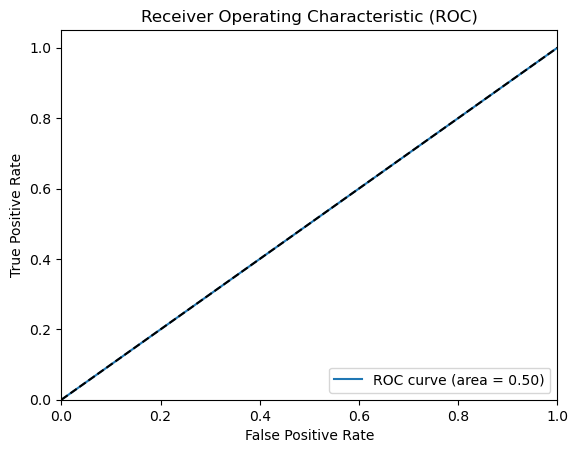

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(qda, X_pca, y, cv=5)

conf_matrix = confusion_matrix(y, y_pred_cv)

class_report = classification_report(y, y_pred_cv)

roc_auc = roc_auc_score(y, y_pred_cv)

fpr, tpr, thresholds = roc_curve(y, y_pred_cv)

print("Confusion matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print("ROC-AUC Score:", roc_auc)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


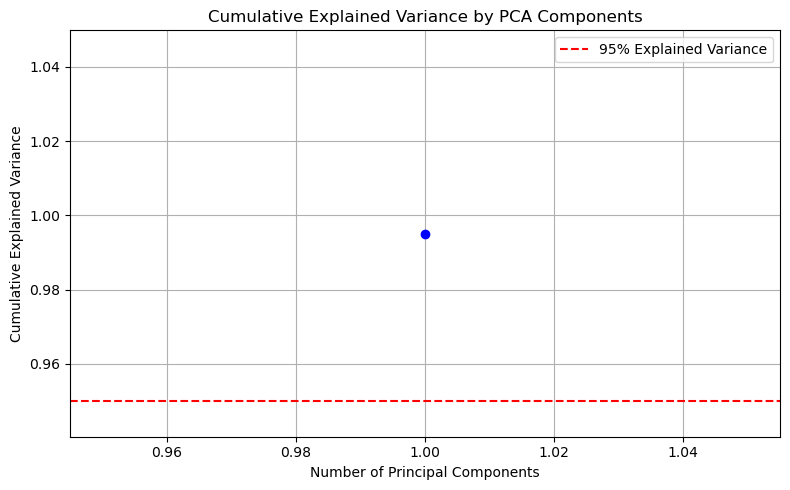

In [15]:
pca.fit(X)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()

plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()
